In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'X_train.csv')
df

,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,19391.0,Carlos Ceron,M,Raw,23.0,87.30,205.0,235.00
1,15978.0,Tito Herrera,M,Wraps,23.0,73.48,220.0,260.00
2,27209.0,Levi Lehman,M,Raw,26.0,112.40,142.5,220.00
3,27496.0,Stacy Hayford,F,Raw,35.0,59.42,95.0,102.50
4,20293.0,Brittany Hirt,F,Raw,26.5,61.40,105.0,127.50
...,...,...,...,...,...,...,...,...
18895,29802.0,Rachael Podolak,F,Raw,20.0,65.70,92.5,135.00
18896,5390.0,Daniel Andersen,M,Raw,23.5,88.85,190.0,230.00
18897,860.0,Mark Brewer,M,Multi-ply,43.0,106.78,206.38,229.06
18898,15795.0,Michael Perkins,M,Raw,22.5,82.00,235.0,272.50


In [3]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

In [4]:
df.columns

Index(['playerId', 'Name', 'Sex', 'Equipment', 'Age', 'BodyweightKg',
       'BestSquatKg', 'BestDeadliftKg'],
      dtype='object')

In [5]:
df.describe()

,playerId,Age,BodyweightKg,BestDeadliftKg
count,18900.00000,18725.00000,18900.000000,18900.00000
mean,15039.49963,29.66470,85.425557,201.12277
std,8674.67268,11.55708,22.959720,62.17163
min,0.00000,7.00000,26.130000,18.10000
25%,7462.75000,21.50000,67.700000,149.85750
50%,15122.50000,26.50000,82.100000,204.12000
75%,22540.25000,35.00000,98.970000,247.50000
max,29998.00000,83.00000,201.000000,408.23000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerId        18900 non-null  float64
 1   Name            18900 non-null  object 
 2   Sex             18900 non-null  object 
 3   Equipment       18900 non-null  object 
 4   Age             18725 non-null  float64
 5   BodyweightKg    18900 non-null  float64
 6   BestSquatKg     18900 non-null  object 
 7   BestDeadliftKg  18900 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

playerId            0
Name                0
Sex                 0
Equipment           0
Age               175
BodyweightKg        0
BestSquatKg         0
BestDeadliftKg      0
dtype: int64

<AxesSubplot:xlabel='Sex'>

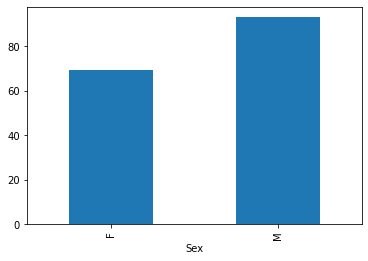

In [8]:
df.groupby('Sex')['BodyweightKg'].mean().plot.bar()

In [9]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

<AxesSubplot:xlabel='Equipment'>

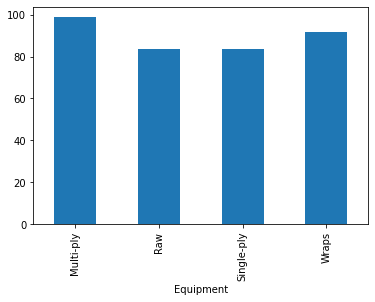

In [10]:
df.groupby('Equipment')['BodyweightKg'].mean().plot.bar()

In [11]:
df['BestSquatKg'].unique()

array(['205.0', '220.0', '142.5', '95.0', '105.0', '260.0', '162.5',
       '200.0', '115.0', '72.5', '157.5', '172.5', '183.7', '292.5',
       '90.0', '215.0', '102.5', '190.0', '122.5', '310.0', '110.0',
       '85.0', '197.5', '204.12', '250.0', '167.5', '97.5', '82.5',
       '145.0', '320.0', '92.5', '255.0', '265.35', '180.0', '283.5',
       '242.5', '225.0', '160.0', '275.0', '235.0', '97.52', '252.5',
       '140.0', '232.5', '175.0', '192.78', '170.0', '240.0', '222.5',
       '227.5', '267.5', '342.5', '177.5', '222.3', '297.1', '137.5',
       '182.5', '155.0', '130.0', '212.5', '295.0', '135.0', '102..5',
       '210.0', '114.99', '295.02', '149.69', '167.83', '165.56', '77.5',
       '230.0', '247.5', '152.5', '112.5', '192.5', '117.5', '165.0',
       '125.0', '285.0', '245.0', '-197.5', '107.5', '297.5', '395.0',
       '280.0', '233.6', '185.0', '207.5', '237.5', '142.88', '195.0',
       '370.0', '302.5', '127.5', '80.0', '430.0', '113.4', '150.0',
       '147.5', '2

In [12]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

In [13]:
df['BestSquatKg'] = df['BestSquatKg'].apply(lambda x: x.replace('..','') )
df['BestSquatKg'] = df['BestSquatKg'].apply(lambda x: x.replace('-','') ).astype(float)

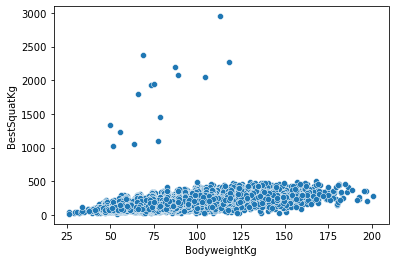

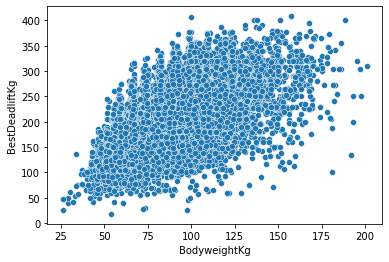

In [14]:
numerical_col =[feature for feature in df.columns if df[feature].dtypes =='float64'and feature not in 'playerId'+ 'Age'+'BodyweightKg']
for feature in numerical_col:
    sns.scatterplot(x='BodyweightKg', y=df[feature],data=df)
    plt.show()

In [15]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

C:\Users\91829\OneDrive\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

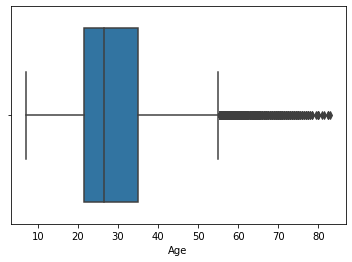

In [16]:
sns.boxplot(df['Age'])

In [17]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

In [18]:
df['Age']=df['Age'].fillna(df.Age.median())

In [19]:
df['Age'].isnull().sum()

0

In [20]:
#drop the playerid and player name
df.drop(['playerId','Name'],axis =1 ,inplace=True)

In [21]:
df.head()

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,M,Raw,23.0,87.30,205.0,235.0
1,M,Wraps,23.0,73.48,220.0,260.0
2,M,Raw,26.0,112.40,142.5,220.0
3,F,Raw,35.0,59.42,95.0,102.5
4,F,Raw,26.5,61.40,105.0,127.5


In [22]:
df.corr()

,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
Age,1.000000,0.109964,-0.024864,-0.030722
BodyweightKg,0.109964,1.000000,0.532202,0.636692
BestSquatKg,-0.024864,0.532202,1.000000,0.745403
BestDeadliftKg,-0.030722,0.636692,0.745403,1.000000


In [23]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

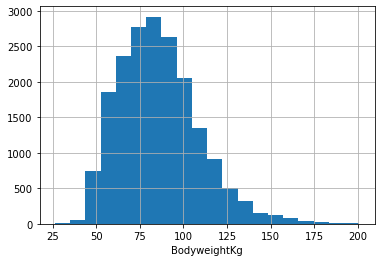

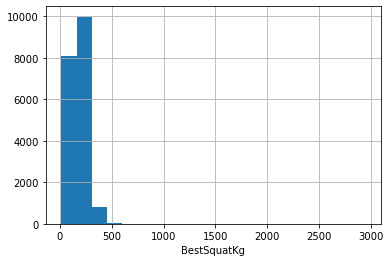

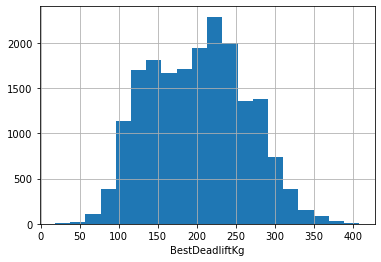

In [24]:
numerical_col = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in 'Age']
for feature in numerical_col:
    df[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.show()
    

In [25]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

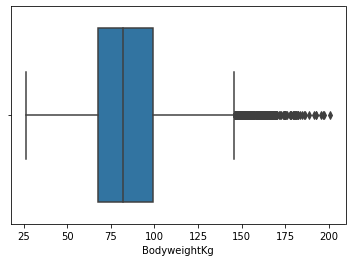

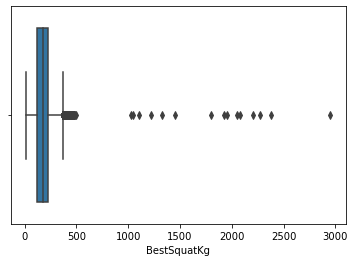

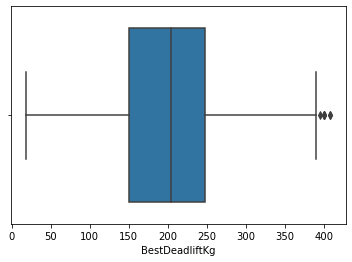

In [26]:
import warnings
warnings.filterwarnings('ignore')
for feature in numerical_col:
    sns.boxplot(df[feature])
    plt.show()

df['BodyweightKg'].unique()

In [27]:
df.corr()

,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
Age,1.000000,0.109964,-0.024864,-0.030722
BodyweightKg,0.109964,1.000000,0.532202,0.636692
BestSquatKg,-0.024864,0.532202,1.000000,0.745403
BestDeadliftKg,-0.030722,0.636692,0.745403,1.000000


In [28]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ..., 118.16, 145.5 ,  51.16])

<AxesSubplot:xlabel='BestSquatKg', ylabel='BestDeadliftKg'>

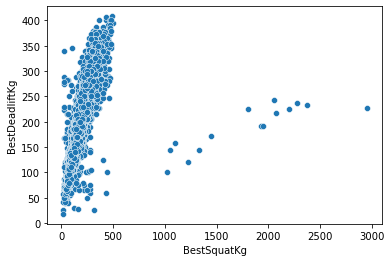

In [29]:
sns.scatterplot(x='BestSquatKg',y='BestDeadliftKg',data=df)

In [30]:
IQR = df['BodyweightKg'].quantile(0.75) -df['BodyweightKg'].quantile(0.25)
IQR

31.269999999999996

In [31]:
lower_limit = df['BodyweightKg'].quantile(0.25) - IQR*1.5
lower_limit

20.79500000000001

In [32]:
upper_limit = df['BodyweightKg'].quantile(0.25) + IQR*1.5
upper_limit

114.60499999999999

In [33]:
df['BodyweightKg']  = np.where(df['BodyweightKg'] < 20.79,20.79,df['BodyweightKg'])
df['BodyweightKg']

0         87.30
1         73.48
2        112.40
3         59.42
4         61.40
          ...  
18895     65.70
18896     88.85
18897    106.78
18898     82.00
18899     59.42
Name: BodyweightKg, Length: 18900, dtype: float64

In [108]:
Equipment =['Equipment']

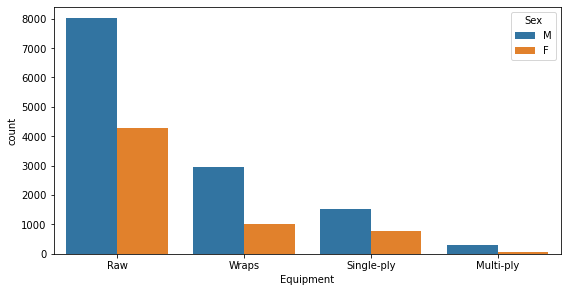

In [109]:
plt.figure(figsize=(20,10))
for i, plot in enumerate (numeric):
    plt.subplot(2,2,i+1)
    sns.countplot(x=plot,hue='Sex',data=df)
    plt.show()

In [34]:
df['BodyweightKg']  = np.where(df['BodyweightKg'] >114.60,114.60,df['BodyweightKg'])
df['BodyweightKg'] 

0         87.30
1         73.48
2        112.40
3         59.42
4         61.40
          ...  
18895     65.70
18896     88.85
18897    106.78
18898     82.00
18899     59.42
Name: BodyweightKg, Length: 18900, dtype: float64

<AxesSubplot:xlabel='BodyweightKg'>

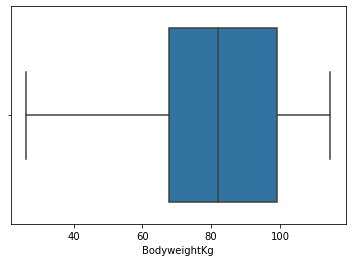

In [35]:
sns.boxplot(df['BodyweightKg'] )

In [36]:
IQR = df['BestDeadliftKg'].quantile(0.75)- df['BestDeadliftKg'].quantile(0.25)
lower_limit = df['BestDeadliftKg'].quantile(0.25) - IQR*1.5
upper_limit = df['BestDeadliftKg'].quantile(0.75) + IQR*1.5
print(lower_limit),print(upper_limit),print(df['BestDeadliftKg'].mean())

3.393749999999983
393.96375
201.12277037037026


(None, None, None)

df['BodyweightKg'] = df.loc[df['BestDeadliftKg'] < 3.39 ,'BestDeadliftKg'] = 3.39
df['BodyweightKg'] = df.loc[df['BestDeadliftKg'] > 296.32 ,'BestDeadliftKg'] = 296.32

In [37]:
df['BestDeadliftKg']  = np.where(df['BestDeadliftKg'] >393.96,393.96,df['BestDeadliftKg'])
df['BestDeadliftKg']

0        235.00
1        260.00
2        220.00
3        102.50
4        127.50
          ...  
18895    135.00
18896    230.00
18897    229.06
18898    272.50
18899    140.00
Name: BestDeadliftKg, Length: 18900, dtype: float64

<AxesSubplot:xlabel='BestDeadliftKg'>

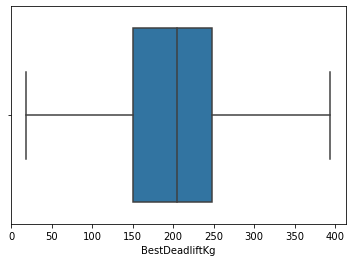

In [38]:
sns.boxplot(data=df,x='BestDeadliftKg')

In [39]:
IQR = df['BestSquatKg'].quantile(0.75)- df['BestSquatKg'].quantile(0.25)
lower_limit = df['BestSquatKg'].quantile(0.25) - IQR*1.5
upper_limit = df['BestSquatKg'].quantile(0.25) + IQR*1.5
print(lower_limit),print(upper_limit),print(df['BestSquatKg'].mean())

-21.25
271.25
180.43177883597866


(None, None, None)

In [40]:
df['BestSquatKg']  = np.where(df['BestSquatKg'] >271.25,271.25,df['BestSquatKg'])
df['BestSquatKg']

0        205.00
1        220.00
2        142.50
3         95.00
4        105.00
          ...  
18895     92.50
18896    190.00
18897    206.38
18898    235.00
18899    130.00
Name: BestSquatKg, Length: 18900, dtype: float64

<AxesSubplot:xlabel='BestSquatKg'>

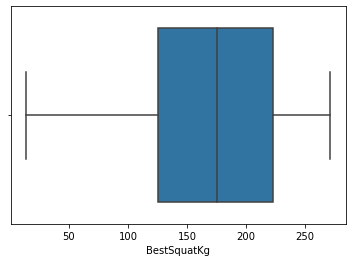

In [41]:
sns.boxplot(data=df,x='BestSquatKg')

In [42]:
df.drop('Age',axis=1)

,Sex,Equipment,BodyweightKg,BestSquatKg,BestDeadliftKg
0,M,Raw,87.30,205.00,235.00
1,M,Wraps,73.48,220.00,260.00
2,M,Raw,112.40,142.50,220.00
3,F,Raw,59.42,95.00,102.50
4,F,Raw,61.40,105.00,127.50
...,...,...,...,...,...
18895,F,Raw,65.70,92.50,135.00
18896,M,Raw,88.85,190.00,230.00
18897,M,Multi-ply,106.78,206.38,229.06
18898,M,Raw,82.00,235.00,272.50


In [43]:
df['BodyweightKg'].unique()

array([ 87.3 ,  73.48, 112.4 , ...,  56.16,  72.61,  51.16])

In [44]:
df.head()

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,M,Raw,23.0,87.30,205.0,235.0
1,M,Wraps,23.0,73.48,220.0,260.0
2,M,Raw,26.0,112.40,142.5,220.0
3,F,Raw,35.0,59.42,95.0,102.5
4,F,Raw,26.5,61.40,105.0,127.5


In [45]:
pd.DataFrame({'Value_count': df['Equipment'].value_counts()})

,Value_count
Raw,12277
Wraps,3965
Single-ply,2317
Multi-ply,341


In [46]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex

,M
0,1
1,1
2,1
3,0
4,0
...,...
18895,0
18896,1
18897,1
18898,1


In [47]:

Equipment = pd.get_dummies(df['Equipment'],drop_first= True)
Equipment

,Raw,Single-ply,Wraps
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
18895,1,0,0
18896,1,0,0
18897,0,0,0
18898,1,0,0


In [48]:
data=df.copy()
data

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,M,Raw,23.0,87.30,205.00,235.00
1,M,Wraps,23.0,73.48,220.00,260.00
2,M,Raw,26.0,112.40,142.50,220.00
3,F,Raw,35.0,59.42,95.00,102.50
4,F,Raw,26.5,61.40,105.00,127.50
...,...,...,...,...,...,...
18895,F,Raw,20.0,65.70,92.50,135.00
18896,M,Raw,23.5,88.85,190.00,230.00
18897,M,Multi-ply,43.0,106.78,206.38,229.06
18898,M,Raw,22.5,82.00,235.00,272.50


In [49]:
data = data.drop (['Sex','Equipment'],axis=1)
data

,Age,BodyweightKg,BestSquatKg,BestDeadliftKg
0,23.0,87.30,205.00,235.00
1,23.0,73.48,220.00,260.00
2,26.0,112.40,142.50,220.00
3,35.0,59.42,95.00,102.50
4,26.5,61.40,105.00,127.50
...,...,...,...,...
18895,20.0,65.70,92.50,135.00
18896,23.5,88.85,190.00,230.00
18897,43.0,106.78,206.38,229.06
18898,22.5,82.00,235.00,272.50


In [50]:
data= pd.concat([data,Equipment,sex],axis=1)

In [51]:
data

,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,Raw,Single-ply,Wraps,M
0,23.0,87.30,205.00,235.00,1,0,0,1
1,23.0,73.48,220.00,260.00,0,0,1,1
2,26.0,112.40,142.50,220.00,1,0,0,1
3,35.0,59.42,95.00,102.50,1,0,0,0
4,26.5,61.40,105.00,127.50,1,0,0,0
...,...,...,...,...,...,...,...,...
18895,20.0,65.70,92.50,135.00,1,0,0,0
18896,23.5,88.85,190.00,230.00,1,0,0,1
18897,43.0,106.78,206.38,229.06,0,0,0,1
18898,22.5,82.00,235.00,272.50,1,0,0,1


In [65]:
X=data.loc[:,['Age','BodyweightKg','BestSquatKg','Raw','Single-ply','Wraps','M']]

In [66]:
X.head()

,Age,BodyweightKg,BestSquatKg,Raw,Single-ply,Wraps,M
0,23.0,87.30,205.0,1,0,0,1
1,23.0,73.48,220.0,0,0,1,1
2,26.0,112.40,142.5,1,0,0,1
3,35.0,59.42,95.0,1,0,0,0
4,26.5,61.40,105.0,1,0,0,0


In [67]:
y=data.iloc[:,3]
y

0        235.00
1        260.00
2        220.00
3        102.50
4        127.50
          ...  
18895    135.00
18896    230.00
18897    229.06
18898    272.50
18899    140.00
Name: BestDeadliftKg, Length: 18900, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [72]:
y_train

7871     140.00
10927    110.00
16372    227.50
6461     190.00
9440      92.99
          ...  
1989     245.00
1550     260.00
18607    230.00
11630    192.50
2546     180.00
Name: BestDeadliftKg, Length: 15120, dtype: float64

In [73]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)


RandomForestRegressor()

[0.05309658 0.06810069 0.52317174 0.0054925  0.00314162 0.00327435
 0.34372251]


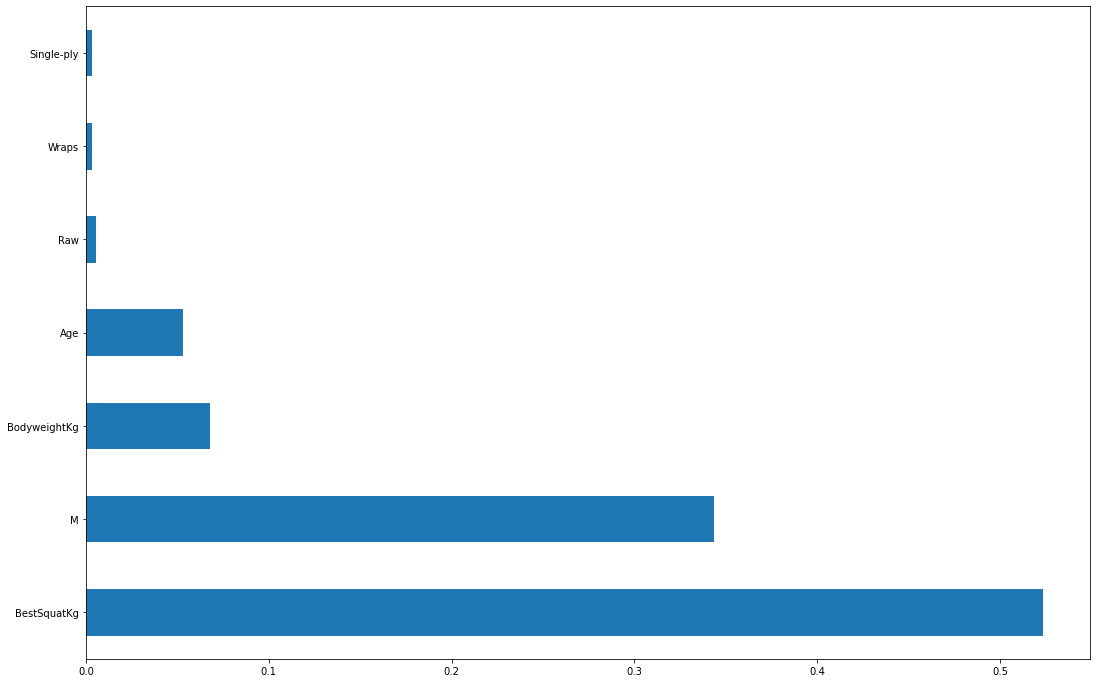

In [79]:
from sklearn.ensemble import ExtraTreesRegressor 
selection = ExtraTreesRegressor()

selection.fit(X,y)

print(selection.feature_importances_)

plt.figure(figsize=(18,12)) 
feat_importance= pd.Series(selection.feature_importances_,index=X.columns) 
feat_importance.nlargest(20).plot(kind='barh') 
plt.show()

In [80]:
y_pred = reg_rf.predict(X_test)

In [81]:
reg_rf.score(X_train,y_train)

0.9709956448280885

In [82]:
reg_rf.score(X_test, y_test)

0.8622631612256682

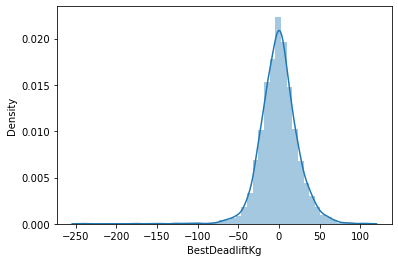

In [83]:
sns.distplot(y_test-y_pred)
plt.show()

In [84]:
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16.893692564193707
MSE: 531.687631906992
RMSE: 23.058352757883466


In [86]:
metrics.r2_score(y_test, y_pred)

0.8622631612256682

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features=['auto','squrt']
max_depth =[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split =[2,5,10,15,100]
min_samples_leaf =[1,2,5,10]

In [89]:
random_grid={'n_estimators': n_estimators,
              'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [90]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=-1)

In [91]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'squrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [93]:
prediction = rf_random.predict(X_test)

In [94]:
prediction

array([234.91198185, 223.15189101, 266.60884226, ..., 147.01208679,
       135.94459386, 265.86520789])

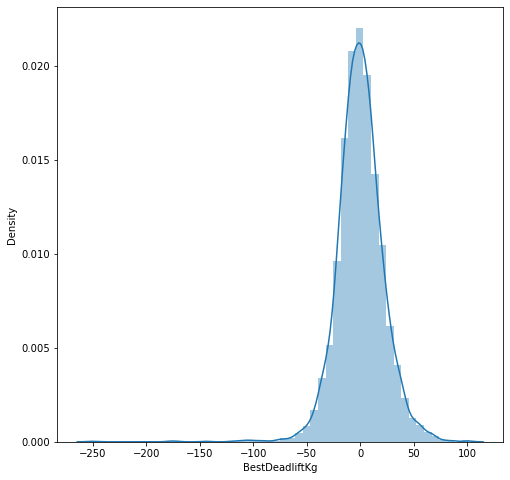

In [95]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

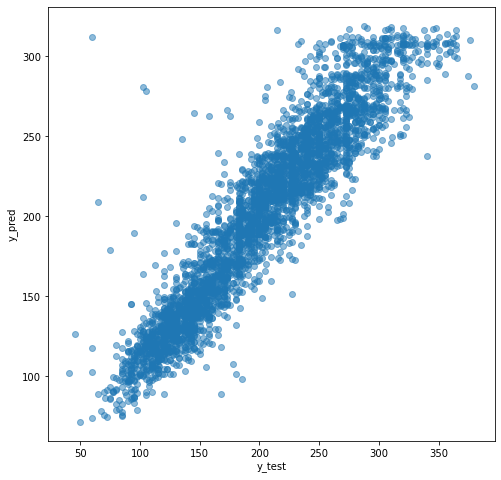

In [96]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 16.0692046225318
MSE: 486.18960160799026
RMSE: 22.049707517515742
